# Análisis bivariado
Es el análisis y comparación entre dos variables, la busqueda de sus relaciones.

### Gráficas de puntos (numérica vs numérica)
Ideal para visualizar la relación entre dos variables numéricas. Hay que tener cuidado cuando tenemos demasiados datos ya que se puede dejar de apreciar la relación al haber zonas completamente cubiertas. Para estos casos lo recomendable es realizar un histograma en dos dimensiones. Vamos a ver estos ejemplos a continuación:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins  # dataset de pinguinos
import pandas as pd
import scipy.stats
import seaborn as sns

In [2]:
# estos fueron los cambios realizados en el notebook anterior
preprocess_penguins_df = palmerpenguins.load_penguins()
process_penguins_df = preprocess_penguins_df.dropna()

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

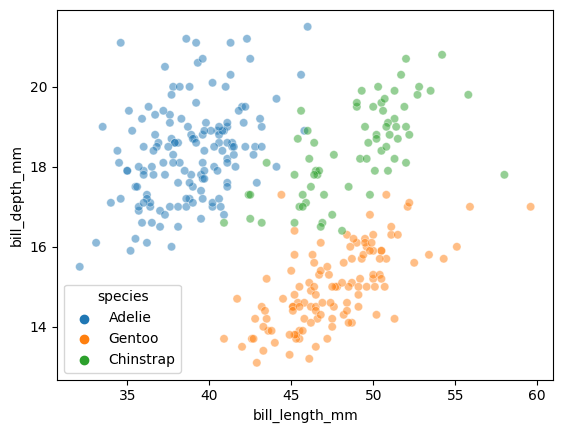

In [5]:
# grafica de puntos o scatterplot
sns.scatterplot(data = process_penguins_df,
                x = 'bill_length_mm',
                y = 'bill_depth_mm',
                alpha = 0.5,
                hue = 'species')

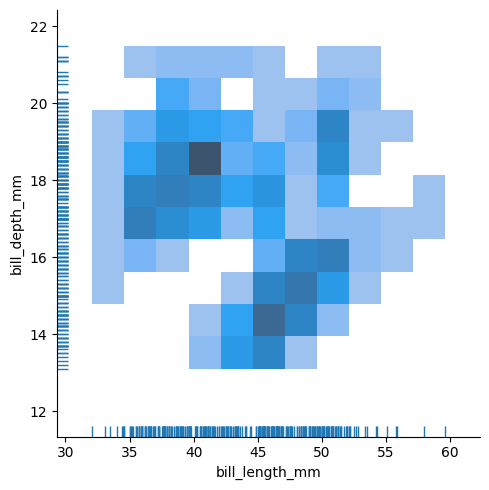

In [8]:
# histograma 2D
# Las zonas más oscuras son donde hay mayor acumulación de puntos
sns.displot(data = process_penguins_df,
                x = 'bill_length_mm',
                y = 'bill_depth_mm',
                rug = True) #lineas en los ejes que denotan la cantidad de puntos

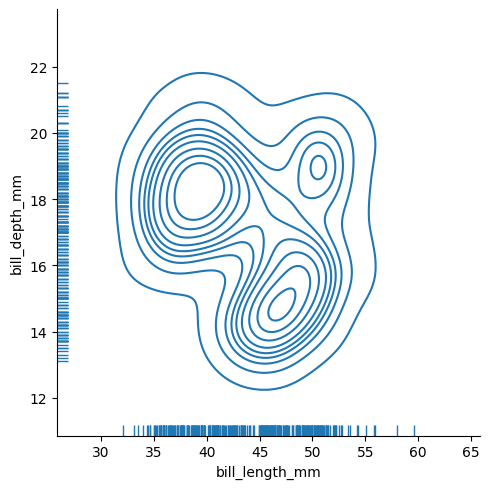

In [9]:
# densidaddes donde a mayor concentración de circulos, 
# mayor concentracion de puntos
sns.displot(data = process_penguins_df,
                x = 'bill_length_mm',
                y = 'bill_depth_mm',
                rug = True,
                kind = 'kde') 

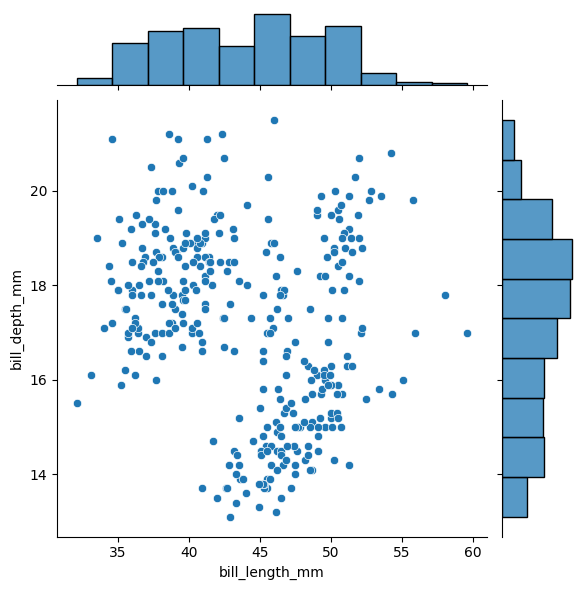

In [13]:
# grafico que contiene scatterplot y distplot
sns.jointplot(data = process_penguins_df,
              x = 'bill_length_mm',
              y = 'bill_depth_mm')

### Gráficos de violin y boxplots (numérica vs categórica)
Hay ocasiones en donde comparamos una variable numérica vs categórica y el scatterplot no se logra visualizar muy bien y es dificil interpretarlo. Por lo que una alternativa son las gráficas de violin y boxplot que nos permite visualizar las distribuciones de la variable numérica por cada valor de la categórica:

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

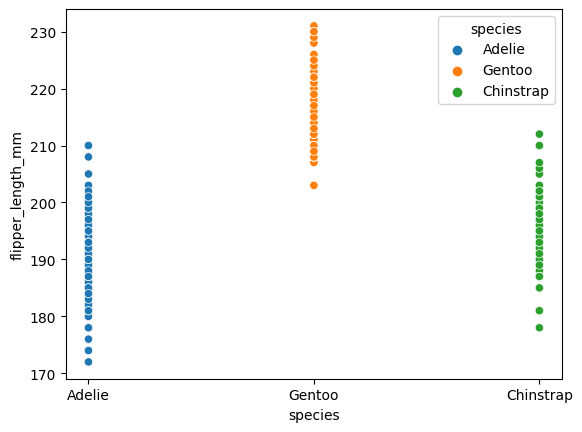

In [17]:
#scatterplot con variable numérica vs categórica
sns.scatterplot(data = process_penguins_df,
                x = 'species',           #categórica
                y = 'flipper_length_mm', #numerica
                hue = 'species') 

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

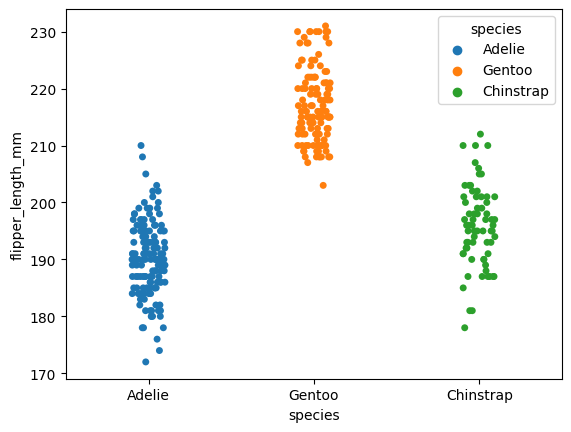

In [18]:
# una forma de arreglarlo es metiendole ruido para que 
# se separen un poco los datos
sns.stripplot(data = process_penguins_df,
                x = 'species',           #categórica
                y = 'flipper_length_mm', #numerica
                hue = 'species')

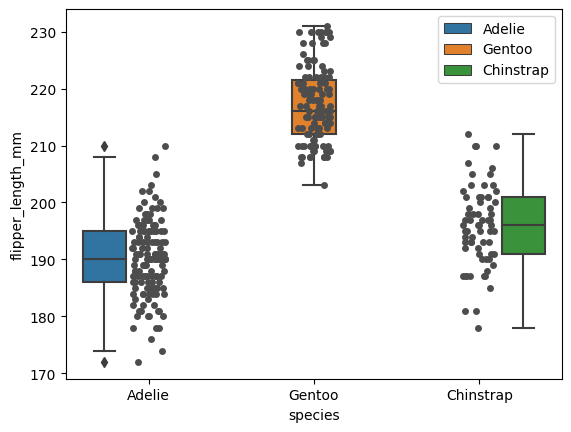

In [27]:
#boxplot
ax = sns.boxplot(data = process_penguins_df,
                x = 'species',           #categórica
                y = 'flipper_length_mm', #numerica
                hue = 'species')

ax = sns.stripplot(data = process_penguins_df,
                x = 'species',           #categórica
                y = 'flipper_length_mm', #numerica
                color = '.3')

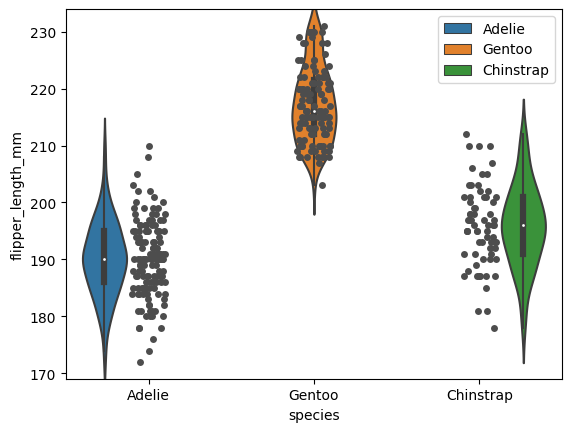

In [29]:
#violinplot
ax = sns.violinplot(data = process_penguins_df,
                x = 'species',           #categórica
                y = 'flipper_length_mm', #numerica
                hue = 'species')

ax = sns.stripplot(data = process_penguins_df,
                x = 'species',           #categórica
                y = 'flipper_length_mm', #numerica
                color = '.3')

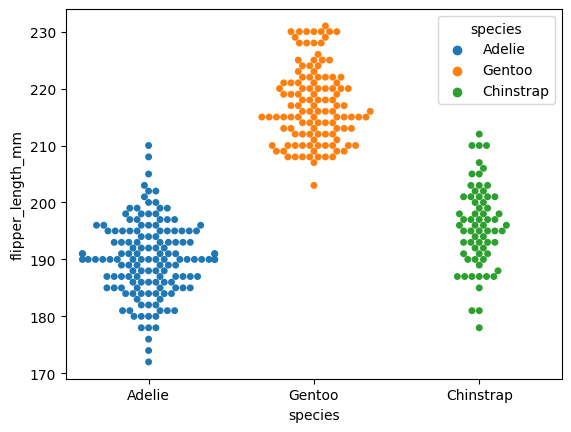

In [30]:
#swarmplot o grafica de enjambre
ax = sns.swarmplot(data = process_penguins_df,
                x = 'species',           #categórica
                y = 'flipper_length_mm', #numerica
                hue = 'species')

### Matrices de correlación (numérica vs numérica)
Algunas veces necesitamos un valor numérico que nos indique que tan relacionadas están dos variables, para ello son los coeficientes de correlación visto en anteriores cursos, donde:
- Si $\rho \sim 1$, hay correlación positiva
- Si $\rho \sim 0$, no hay correlación 
- Si $\rho \sim -1$, hay correlación negativa

La correlación no implica causalidad; es decir; que dos variables estén correlacionadas, no implica que una sea causante de la otra, por lo que si encontramos una correlación, hay que evaluar si esa variable implica la otra. Esto se realiza mediante experimentos más complejos y depende de cada caso.

In [32]:
#coeficientes de correlación
process_penguins_df.corr(numeric_only  = True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


<AxesSubplot: >

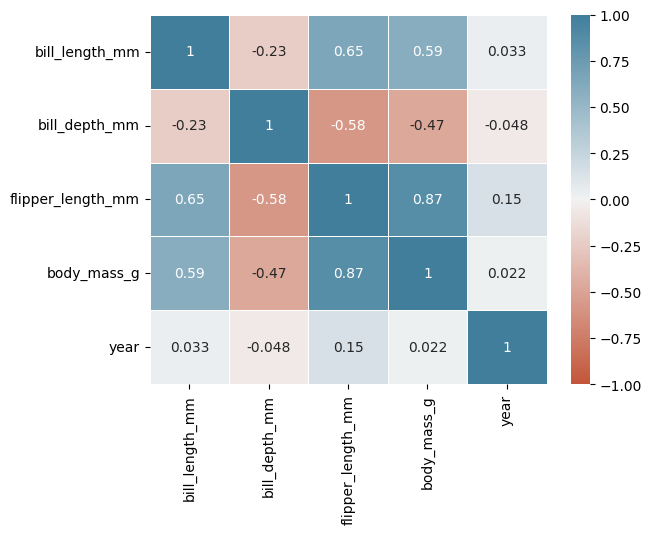

In [38]:
# una forma mas bonita de visualizarlo es con heatmap
sns.heatmap(
    data = process_penguins_df.corr(numeric_only=True),
    center = 0,  #configuracion de la barra lateral
    vmin = -1,
    vmax = 1,
    linewidths= 0.5,  #ancho de las lineas que divide cada cuadro
    annot = True, # si anota los valores en el cuadro
    cmap = sns.diverging_palette(20,230, as_cmap = True) # paleta de colores
)

Con lo anterior podemos visualizar que las variables más correlacionadas son las de 'body_mass_g' y 'flipper_length_mm' (masa del pinguino y la longitud de las alas).

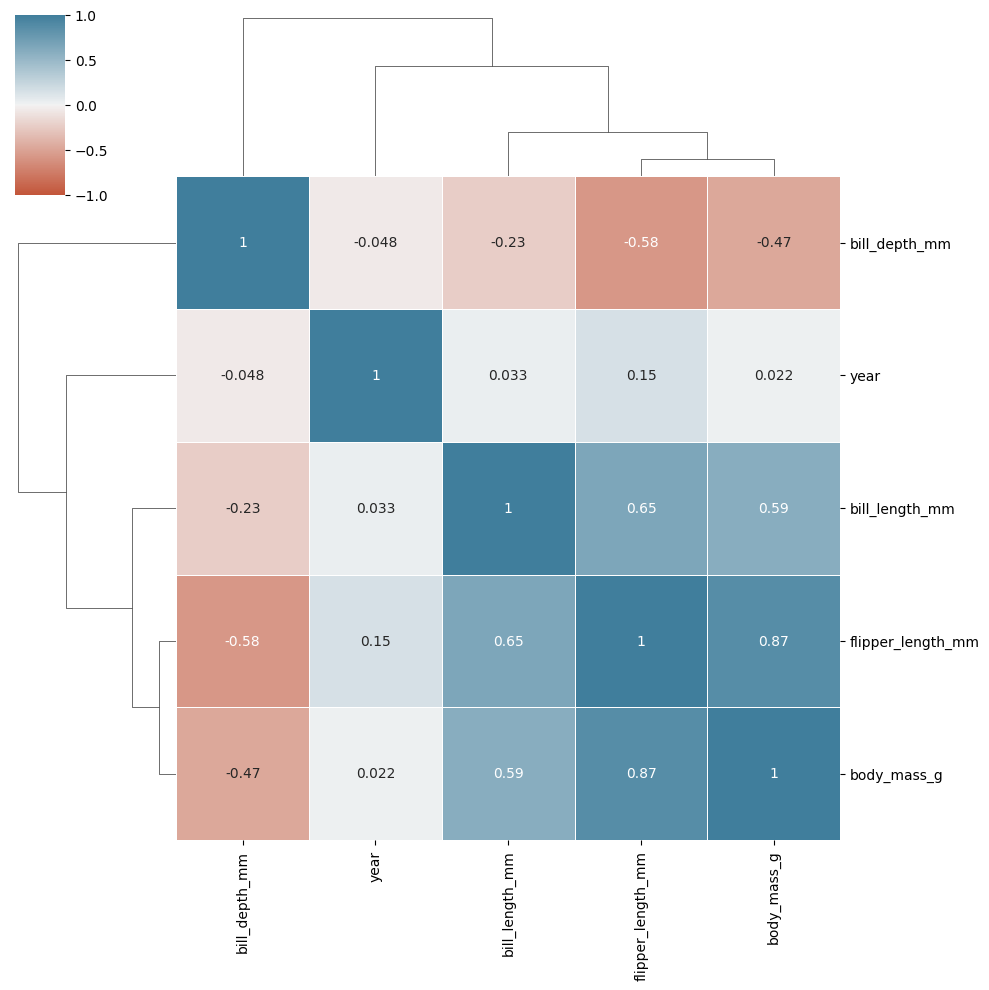

In [40]:
# clustermap
# es una mapa de calor ordenado de acuerdo a correlaciones

sns.clustermap(
    data = process_penguins_df.corr(numeric_only=True),
    center = 0,  #configuracion de la barra lateral
    vmin = -1,
    vmax = 1,
    linewidths= 0.5,  #ancho de las lineas que divide cada cuadro
    annot = True, # si anota los valores en el cuadro
    cmap = sns.diverging_palette(20,230, as_cmap = True) # paleta de colores
 ) 

¿Se puede buscar una correlación con una variable categórica?
La respuesta es si, para ello la variable categórica hay que transformarla a una numerica (sería numerica discreta) y compararla. Pero hay que tener cuidado con su interpretación, sobre todo cuando son pocas opciones en la variable categórica.

/tmp/ipykernel_322/561198701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_penguins_df['numeric_sex']= process_penguins_df['sex'].map({'female':0, 'male':1})


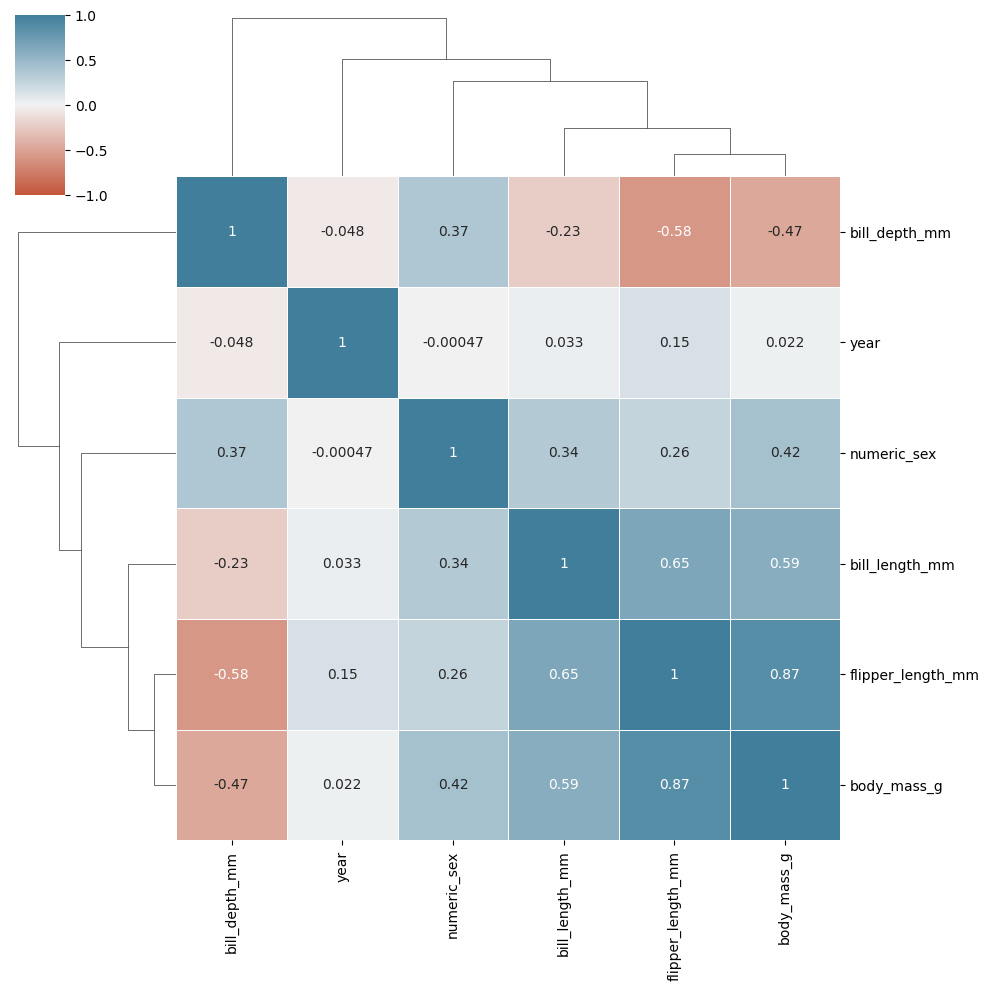

In [43]:
process_penguins_df['numeric_sex']= process_penguins_df['sex'].map({'female':0, 'male':1})

sns.clustermap(
    data = process_penguins_df.corr(numeric_only=True),
    center = 0,  #configuracion de la barra lateral
    vmin = -1,
    vmax = 1,
    linewidths= 0.5,  #ancho de las lineas que divide cada cuadro
    annot = True, # si anota los valores en el cuadro
    cmap = sns.diverging_palette(20,230, as_cmap = True) # paleta de colores
)

La metriz solo nos ayuda a saber sobre relaciones lineales, pero pueden ocurrir otro tipos de relaciones no lineales entre las variables. Veamos un ejemplo:

array([[ 1.        , -0.01787805],
       [-0.01787805,  1.        ]])

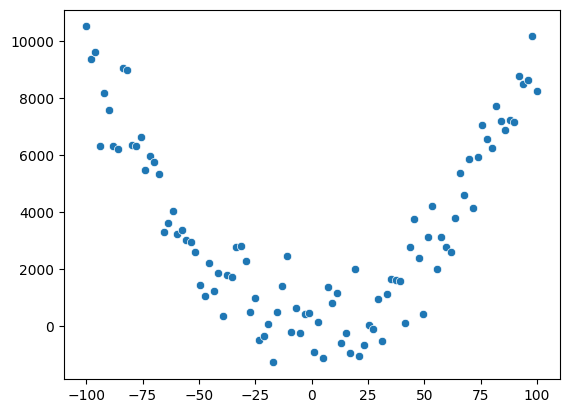

In [45]:
x = np.linspace(-100,100,100)
y = x**2 
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x,y=y)

#Calculando el coeficiente de correlacion
np.corrcoef(x,y) 

Observamos que la correlación lineal es cercana a cero, pero no significa que no haya relación ya que existe una relación cuadrática

array([[1.        , 0.91673839],
       [0.91673839, 1.        ]])

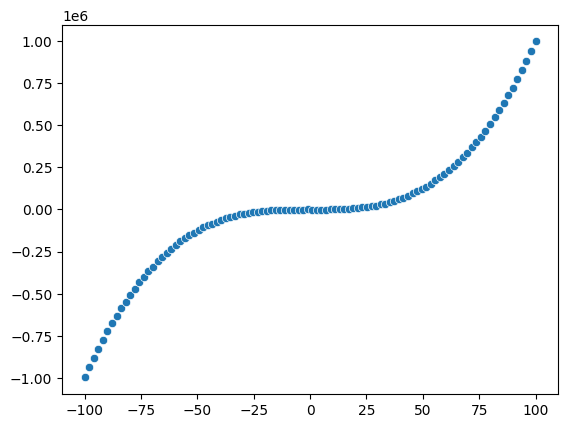

In [46]:
# relación cúbica
x = np.linspace(-100,100,100)
y = x**3 
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x,y=y)

#Calculando el coeficiente de correlacion
np.corrcoef(x,y) 

En la relación cúbica, el coef. de correlación es muy alto pero no es una correlación lineal sino cúbica, por lo que hay que tener cuidado sobre la interpretación del coeficiente.

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


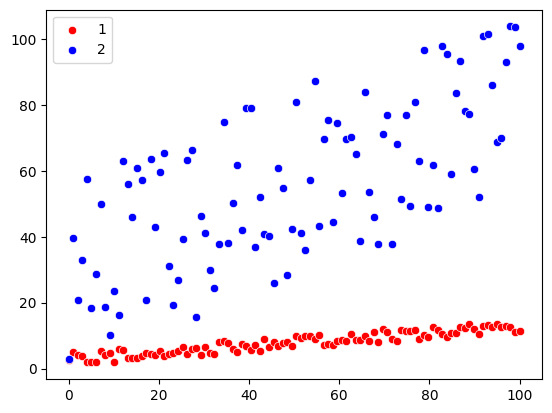

In [48]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1, color = 'red')


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2, color = 'blue')

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

En la visualización anterior, vemos que la dispersión de los datos afecta al coeficiente de relación, por lo que un valor más alto no necesariamente implica una pendiente más alta. En este caso los datos en rojo tienen un mayor coef. de  0.92, mientras que los azules uno de 0.67, sin embargo, el azul tiene una pendiente más pronunciada que el rojo.

### Regresión lineal simple
Sirve para calcular la fuerza de efecto entre una variable y otra, ya que permite cuantificar que tanto una implica la otra por medio de la relación lineal.

In [53]:
#regresión lineal de los puntos anteriores
res1 = scipy.stats.linregress(x = x1, y= y1) #puntos rojos
res2 = scipy.stats.linregress(x = x2, y= y2) # puntos azules

print(res1,res2,sep='\n\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)

LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


Corroboramos que para los puntos rojos se tiene el siguiente resultado:
$$y_{red} = (0.100 \pm  0.004)x + (2.8 \pm 0.2)  \qquad R^2 = 0.92$$
Y para los puntos azules:
$$y_{blue} = (0.54 \pm 0.06) x + (28 \pm 3) \qquad R^2 = 0.67$$

Donde el estadístico $R^2$ es el coeficiente de determinación  o bien bondad del ajuste, nos ayuda a determinar que tan confiable es nuestro resultado, mientras más cercano a 1 mayor confiabilidad.

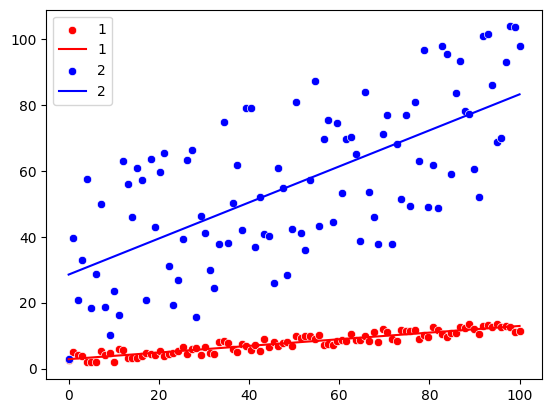

In [58]:
#Graficando los ajustes
sns.scatterplot(x=x1, y=y1, color = 'red')

fx1 = np.array([x1.min(), x1.max()])
fy1 = res1.intercept + res1.slope * fx1

plt.plot(fx1, fy1, color = 'red')


sns.scatterplot(x=x2, y=y2, color = 'blue')

fx2 = np.array([x2.min(), x2.max()])
fy2 = res2.intercept + res2.slope * fx2

plt.plot(fx2, fy2, color = 'blue')

plt.legend(["1", "1","2","2"])

plt.show()

Anteriormente vimos que las variables 'body_mass_g' y 'flipper_length_mm'  tienen una correlación alta, por lo que vamos a analizarlas más a fondo

LinregressResult(slope=0.015195264815217668, intercept=137.03962089225467, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=0.00046665391049053467, intercept_stderr=1.9987694290243143)


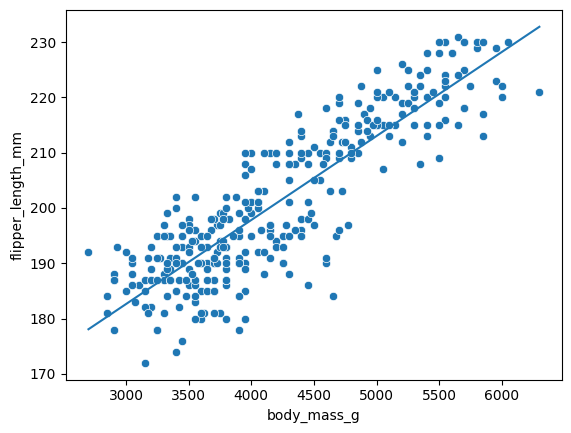

In [63]:
sns.scatterplot(process_penguins_df, x="body_mass_g", y="flipper_length_mm")

res_penguins = scipy.stats.linregress(x=process_penguins_df.body_mass_g, y=process_penguins_df.flipper_length_mm)

print(res_penguins)

fx1 = np.array([process_penguins_df.body_mass_g.min(), process_penguins_df.body_mass_g.max()])
fy1 = res_penguins.intercept + res_penguins.slope * fx1

plt.plot(fx1,fy1) 

$$y_{res} = (0.0151 \pm  0.0004)x + (137 \pm 0.2);  \qquad R^2 = 0.87$$

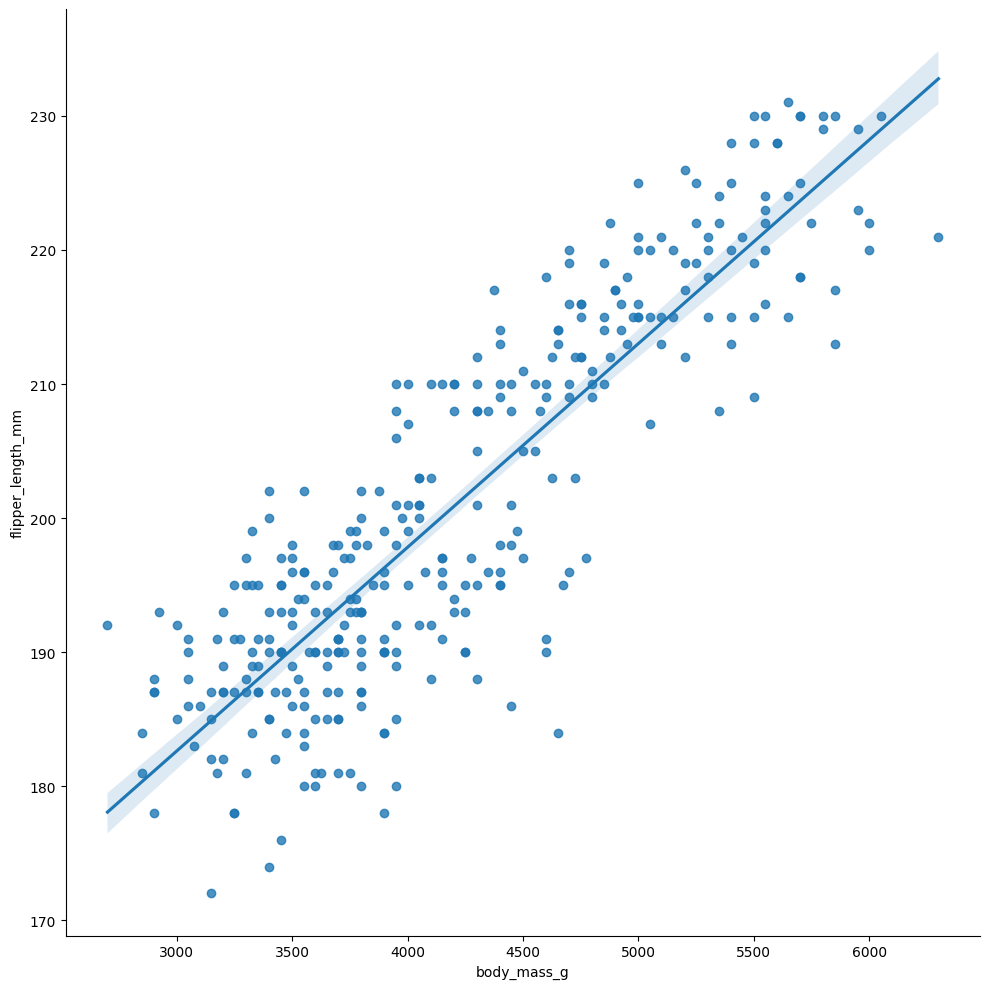

In [66]:
# seaborn nos permite realizar la misma gráfica pero sin arrojar 
# los resultados como la pendiente y la interseccion como lo hace scipy

sns.lmplot(data = process_penguins_df,
            x="body_mass_g",
            y="flipper_length_mm",
            height = 10)

Podemos decir que hay una relación lineal positiva, aunque el estadístico $R^2 = 0.87$ nos indica que la función lineal obtenida no es muy precisa.

Algunas otras consideraciones a tomar es:
1. La regresión lineal no es simétrica. (los valores como pendiete e intersección no son iguales en una relación A-B vs B-A)

LinregressResult(slope=50.153265942241134, intercept=-5872.092682842826, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=1.540230983824635, intercept_stderr=310.2851553513499)


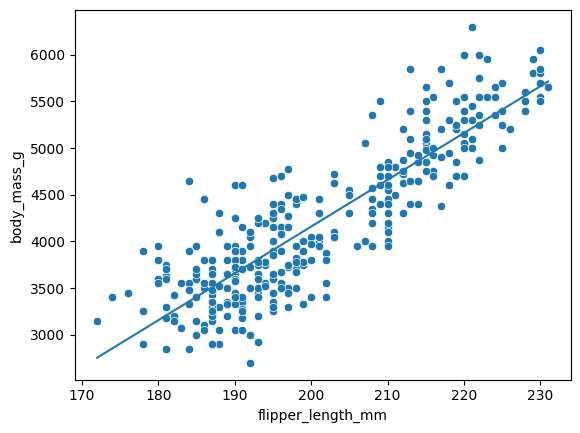

In [71]:
sns.scatterplot(process_penguins_df, x="flipper_length_mm", y="body_mass_g")

res_penguins = scipy.stats.linregress(x=process_penguins_df.flipper_length_mm, y=process_penguins_df.body_mass_g)

print(res_penguins)

fx1 = np.array([process_penguins_df.flipper_length_mm.min(), process_penguins_df.flipper_length_mm.max()])
fy1 = res_penguins.intercept + res_penguins.slope * fx1


plt.plot(fx1,fy1) 
plt.show()


$$y_{res} = (50 \pm  1)x + (-6000 \pm 300);  \qquad R^2 = 0.87$$

2. La regresión lineal no nos dice nada sobre causalidad, pero existen herramientas para separar las relaciones entre multiples variables

In [72]:
import statsmodels.formula.api as smf

In [77]:
smf.ols(
    formula = 'body_mass_g ~ flipper_length_mm', # Y ~ X
    data = process_penguins_df
).fit().params

Intercept           -5872.092683
flipper_length_mm      50.153266
dtype: float64